# Handling Missing Data in Agricultural Health Dataset

## Step 1: Load and Standardize the Dataset

### Why This Step?

Standardization is essential for three key reasons:

1. **Consistency**: The dataset contains multiple representations of missing values (`'non spécifié'`, `'#VALUE!'`, `'-'`, etc.) which need to be unified for consistent processing.

2. **Tool Compatibility**: Python libraries like pandas and scikit-learn expect missing values as `NaN` for their imputation functions to work properly.

3. **Pattern Recognition**: Standardizing missing values allows us to properly visualize and analyze missingness patterns, which is crucial for determining appropriate imputation strategies.

### What We Did

* Loaded the Excel file using `pandas`.
* Replaced all identified missing value indicators with `NaN`:
  * `'non spécifié'`, `'Non spécifié'`
  * `'#VALUE!'`
  * `'-'`
  * `'non faite'`
  * Empty strings (`''`)
* Visualized the missing data with:
   1. A **heatmap** to show missingness across rows and columns, revealing patterns and potential relationships.
   2. A **bar plot** to display the percentage of missing data per column, highlighting the variables with most significant missingness.
* Saved the standardized dataset to a new Excel file for further processing.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

# Load the Excel dataset
data = pd.read_excel('female_farmers_data.xlsx')

# List of missing value indicators from Codebook Analysis
missing_indicators = ['non spécifié', '#VALUE!', '-', 'non faite', 'Non spécifié', '']
data.replace(missing_indicators, np.nan, inplace=True)

# Quick look at the original dataset
print("Original dataset:")
print(data.head())
print(data.info())

# List of descriptive text columns to drop
descriptive_columns = [

    'Nom', 'Prénom', 'N° du téléphone', 'Date de la visite'  
    'Antécédents familiaux', 'Antécédent personnels: chirurgicaux', 
    'Tâches effectuées', 'Contraintes physiques', 
    'Troubles cardio-respiratoires', 'Troubles cognitifs', 'Troubles neurologiques', 'Troubles cutanés/phanères', 'Autres plaintes', 
    'Examen buccodentaire', 'Examen des membres supérieurs', 
    'Examen du rachis', 'Examen des téguments', 'Examen neurologique', 'Examen abdominal', 'Examen visuel','Mécanisme AT', 
    'Troubles gynécologiques','Professions antérieures','Examen cardiovasculaire et pulmonaire','Autres plaintes:','Examen tête et cou','q','Interprétation Spiro',
]

# Drop the descriptive text columns
data_cleaned = data.drop(columns=descriptive_columns, errors='ignore')  # errors='ignore' ensures no error if a column is missing

# Quick look at the cleaned dataset
print("\nAfter dropping descriptive columns:")
print(data_cleaned.head())
print(data_cleaned.info())


# Save the standardized dataset (without descriptive columns) to a new file
data_cleaned.to_excel('standardized_female_farmers_data_no_text.xlsx', index=False)
print("Standardized dataset without descriptive text columns saved as 'standardized_female_farmers_data_no_text.xlsx'")

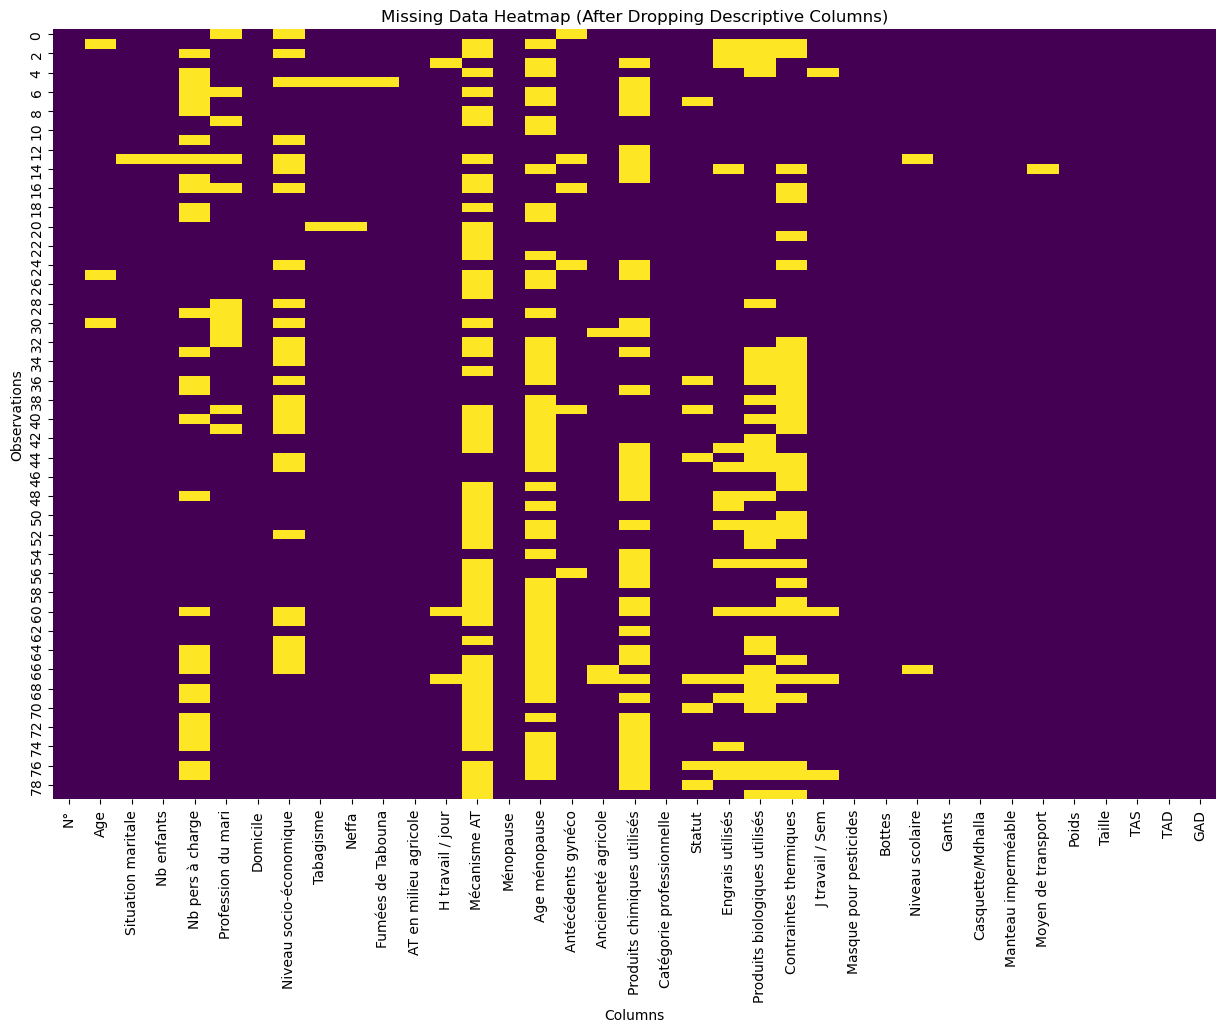

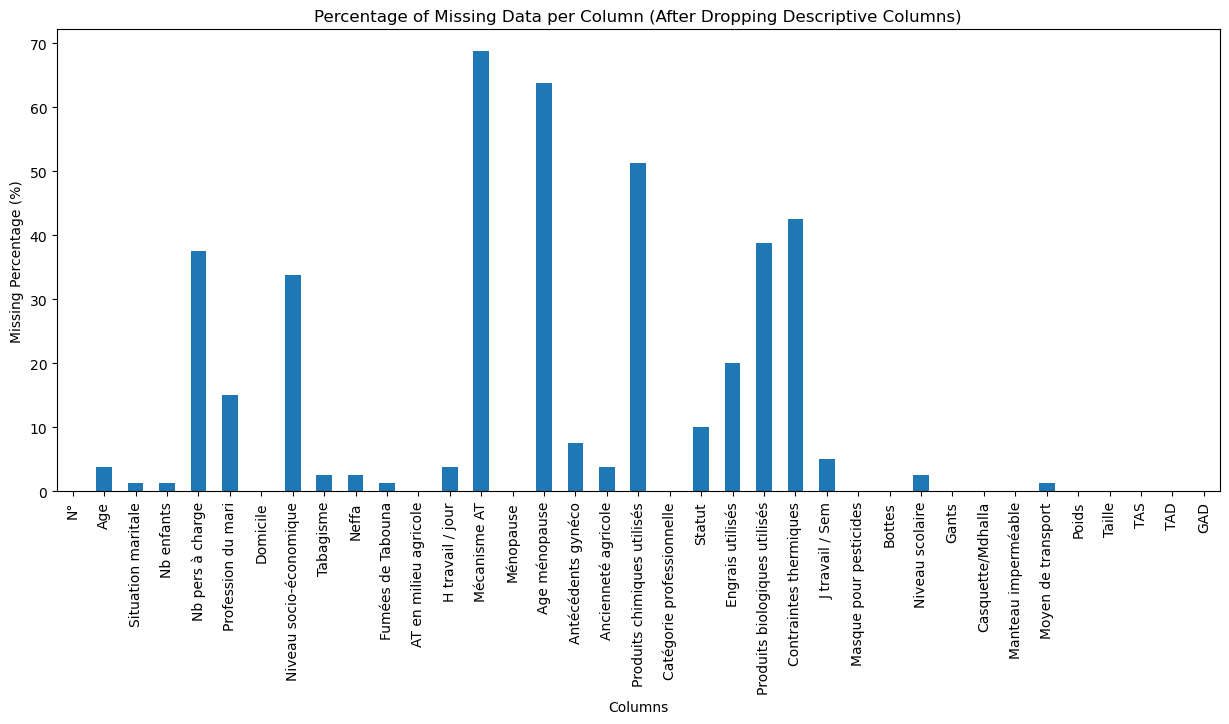

In [5]:
data_cleaned =pd.read_excel('standardized_female_farmers_data_no_text.xlsx')
# Visualization 1: Missing Data Heatmap (after dropping columns)
plt.figure(figsize=(15, 10))
sns.heatmap(data_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap (After Dropping Descriptive Columns)')
plt.xlabel('Columns')
plt.ylabel('Observations')
plt.show()

# Visualization 2: Missing Data Percentage per Column (after dropping columns)
missing_percent = data_cleaned.isnull().mean() * 100
plt.figure(figsize=(15, 6))
missing_percent.plot(kind='bar')
plt.title('Percentage of Missing Data per Column (After Dropping Descriptive Columns)')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=90)
plt.show()